# introduction-to-scikit-learn

In [5]:
# What we are going to cover:

# 0. Workflow
# 1. Data ready
# 2. Choose the right model
# 3. Fit the model
# 4. Evaluation
# 5. Improve 
# 6. Save ans load
# 7. Putting it all together

# Workflow

In [6]:
# data ready
import pandas as pd
hd = pd.read_csv("heart-disease.csv")

In [7]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# create X 
x = hd.drop("target",axis=1)

# create Y
y = hd["target"]

In [9]:
# classifation problem - choose the right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [10]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
# Fit the model to the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
#make prediction
y_preds = clf.predict(x_test)

In [14]:
y_preds

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [15]:
y_test

56     1
292    0
261    0
269    0
247    0
      ..
294    0
170    0
278    0
128    1
127    1
Name: target, Length: 61, dtype: int64

In [16]:
# evaluate
clf.score(x_train,y_train)

1.0

In [17]:
clf.score(x_test,y_test)

0.7868852459016393

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.78      0.89      0.83        35

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



In [20]:
confusion_matrix(y_test,y_preds)

array([[17,  9],
       [ 4, 31]], dtype=int64)

In [21]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [22]:
# Improve a model
import numpy as np
np.random.seed(42)
for i in range(10,100,10):
    print(f"estimators - {i} ")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"accuracy - {clf.score(x_test,y_test)*100:.2f}%")
    print("")

estimators - 10 
accuracy - 75.41%

estimators - 20 
accuracy - 73.77%

estimators - 30 
accuracy - 78.69%

estimators - 40 
accuracy - 78.69%

estimators - 50 
accuracy - 80.33%

estimators - 60 
accuracy - 78.69%

estimators - 70 
accuracy - 73.77%

estimators - 80 
accuracy - 81.97%

estimators - 90 
accuracy - 78.69%



In [23]:
# save model
import pickle
pickle.dump(clf,open("scikitlearn-savemodel/random_forest_model1.pkl","wb"))

In [24]:
#load
loaded_model=pickle.load(open("scikitlearn-savemodel/random_forest_model1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.7868852459016393

In [25]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.6 | packaged by conda-forge | (main, Oct 24 2022, 16:02:16) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Pradip Jaliya\ml_project1\env\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
      sklearn: 1.1.2
          pip: 22.2.2
   setuptools: 65.4.0
        numpy: 1.23.3
        scipy: 1.9.1
       Cython: None
       pandas: 1.5.0
   matplotlib: 3.5.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
        version: 0.3.20
threading_layer: pthreads
   architecture: Haswell
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\sklearn\.

# Data ready

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# split the data
# filling missing value
# converting 

In [28]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
x = hd.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y = hd["target"]

In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
# Split the data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
x_train.shape

(242, 13)

In [37]:
y_train.shape

(242,)

In [38]:
x_test.shape

(61, 13)

In [39]:
y_test.shape

(61,)

In [40]:
len(hd)

303

# # Convert in numerical

In [41]:
# Convert in numerical

In [42]:
cse = pd.read_csv("car-sales-extended-missing-data.csv")

In [43]:
len(cse)

1000

In [44]:
type(cse)

pandas.core.frame.DataFrame

In [45]:
cse.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
cse.shape

(1000, 5)

In [47]:
cse.shape[0]

1000

In [48]:
cs = pd.read_csv("car-sales-extended.csv")

In [49]:
cs.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [50]:
cs.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [51]:
# split into x and y

In [52]:
x = cs.drop("Price",axis=1)

In [53]:
y = cs["Price"]

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2)

In [55]:
# build model

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
model = RandomForestRegressor()

In [58]:
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
## here machine learning don't know string

In [ ]:
# convert string to int

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
from sklearn.compose import ColumnTransformer

In [66]:
cs["Doors"].value_counts()
# here doors also catagorical data that way this convert into int

4    856
5     79
3     65
Name: Doors, dtype: int64

In [67]:
cateforical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,
                                   cateforical_features)],
                                   remainder = "passthrough")

In [68]:
t_x = transformer.fit_transform(x)

In [69]:
t_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [70]:
df_tx = pd.DataFrame(t_x)

In [71]:
df_tx

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [72]:
cs["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [73]:
cs["Colour"].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [74]:
# other methode two conver string to int
dummies = pd.get_dummies(cs[["Make","Colour","Doors"]])

In [75]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [76]:
dummies.head()
# here doors are already in int, that way dummies not reconvert in int 

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [77]:
# Now data is int

In [78]:
# Let's refit the model

In [79]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(df_tx,y,test_size=0.2)

In [80]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [81]:
model.score(x_test,y_test)

0.3235867221569877

# # Remove missing value

In [82]:
# fill with some value
# remove the samples 

In [83]:
# import missing value dataset
csem = pd.read_csv("car-sales-extended-missing-data.csv")

In [84]:
csem.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [85]:
csem.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [86]:
# count number of missing value in colume
csem.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [87]:
# create x and y

In [88]:
xm = csem.drop("Price",axis=1)

In [89]:
ym = csem["Price"]

In [90]:
xm_train,xm_test,ym_train,ym_test = train_test_split(xm,ym,
                                                 test_size=0.2)

In [91]:
xm_train.head(10)

,Make,Colour,Odometer (KM),Doors
131,Toyota,Red,29689.0,4.0
206,Honda,White,211862.0,4.0
898,Toyota,Blue,237448.0,4.0
916,Honda,Black,134825.0,4.0
110,Toyota,White,221050.0,4.0
354,Honda,Blue,196835.0,4.0
372,Honda,NaN,178774.0,4.0
594,Honda,Blue,223005.0,4.0
744,Toyota,Green,172493.0,4.0
737,Toyota,Blue,223875.0,4.0


In [92]:
# convert first non-numerical to numerical

In [93]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# cateforical_features = ["Make","Colour","Doors"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",one_hot,
#                                    cateforical_features)],
#                                    remainder = "passthrough")
# t_xm = transformer.fit_transform(xm)

In [94]:
# df_txm = pd.DataFrame(t_xm)

In [95]:
# df_txm.head(10)

In [96]:
# dummies = pd.get_dummies(csem[["Make","Colour","Doors"]])

In [97]:
# dummies.head(10)

In [98]:
# csem.head(10)

In [99]:
print("Fill missing value")

Fill missing value


In [100]:
# fill missing value with pandas

In [101]:
csem["Make"].fillna("missing",inplace=True)

In [102]:
csem["Colour"].fillna("missing",inplace=True)

In [103]:
csem["Odometer (KM)"].fillna("missing",inplace=True)

In [104]:
csem["Doors"].fillna(4,inplace=True)

In [105]:
csem.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,missing,4.0,20306.0
8,missing,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [106]:
#NaN fill with missing 

In [107]:
csem.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [108]:
# remove rows with missing price value
csem.dropna(inplace=True)

In [109]:
csem.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [110]:
# now no missing value

In [111]:
len(csem)

950

In [112]:
x = csem.drop("Price",axis=1)

In [113]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [114]:
y=csem["Price"]

In [115]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cateforical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,
                                    cateforical_features)],
                                    remainder = "passthrough")
t_csem = transformer.fit_transform(csem)
dft_csem = pd.DataFrame(t_csem)
dft_csem

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [116]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(t_csem,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'missing'

In [117]:
dummies = pd.get_dummies(csem[["Make","Colour","Doors"]])

In [118]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,0,1,0,0,0,0,0,0,0,1,0
1,5.0,1,0,0,0,0,0,1,0,0,0,0
2,4.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,0,0,0,1,0,0,0,0,0,1,0
4,3.0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,0,0,0,1,0,1,0,0,0,0,0
996,3.0,0,0,0,0,1,0,0,0,0,1,0
997,4.0,0,0,1,0,0,0,1,0,0,0,0
998,4.0,0,1,0,0,0,0,0,0,0,1,0


In [119]:
# fill missing value with scikit learn

In [120]:
csems = pd.read_csv("car-sales-extended-missing-data.csv")

In [121]:
csems.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [122]:
csems.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [123]:
csems.dropna(subset=["Price"],inplace=True)

In [124]:
csems.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [125]:
xms = csems.drop("Price",axis=1)

In [126]:
yms = csems["Price"]

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                             ("door_imputer",door_imputer,door_features),
                             ("num_imputer",num_imputer,num_features)])
filled_x = imputer.fit_transform(xms)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [128]:
fill_csems = pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])

In [129]:
fill_csems.shape

(950, 4)

In [130]:
fill_csems.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [131]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cateforical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,
                                    cateforical_features)],
                                    remainder = "passthrough")
t_fcsems = transformer.fit_transform(fill_csems)
dft_csems = pd.DataFrame(t_fcsems)
dft_csems

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
946,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
947,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [132]:
dft_csems.shape

(950, 1)

In [133]:
t_fcsems

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [135]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(t_fcsems,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

# Choos right model

In [136]:
# Picking machine learing model for regression

In [137]:
# import data set 

In [162]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [163]:
type(boston)

sklearn.utils._bunch.Bunch

In [164]:
# conver in df

In [166]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

In [167]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [168]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [169]:
boston_df["target"] = pd.Series(boston["target"])

In [170]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [171]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [172]:
# here all in numeric

In [173]:
# Let's try ridge regression model

In [176]:
from sklearn.linear_model import Ridge
np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = Ridge()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.666222167016852

In [177]:
# how to improve score

In [178]:
# try random forest regressor

In [183]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(100)
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.8654448653350507

In [180]:
# awesome score 86% is good one

In [184]:
### choosing for classifiaction problem

In [185]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [186]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [187]:
len(hd)

303

In [188]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [189]:
# all in numerical data

In [190]:
# try LinearSVC

In [196]:
from sklearn.svm import LinearSVC

np.random.seed(1)

x = hd.drop("target",axis=1)
y = hd["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = LinearSVC()

clf.fit(x_train,y_train)

clf.score(x_test,y_test)

C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4918032786885246

In [195]:
hd["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [197]:
# here is 50% not good 

In [198]:
# improve model

In [199]:
# try random forest classifire

In [201]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = hd.drop("target",axis=1)
y = hd["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [202]:
# awesome it's good one 85% score

In [203]:
## 1. if we have structured data used ensemble methoes
## 2. if we have unstructured data use deep learning or transfer learing

# Fitting and Predictions

In [204]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = hd.drop("target",axis=1)
y = hd["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()


# Fit the model to the data
clf.fit(x_train,y_train) # find the perttan or train model


clf.score(x_test,y_test) # use the parttan and pridict and than score calculate

0.8524590163934426

In [205]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [206]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Make prediction 

In [207]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = hd.drop("target",axis=1)
y = hd["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()


# Fit the model to the data
clf.fit(x_train,y_train) # find the perttan or train model


clf.score(x_test,y_test) # use the parttan and pridict and than score calculate

0.8524590163934426

In [208]:
# Use a train model to make pradiction

In [209]:
# 2 way to make predictions
# predict()
# predict_proba()

In [232]:
# predict

In [231]:
clf.predict(np.array([1,2,3,4,5,6,7,8,9,1,2,3,4]).reshape(1,-1))

C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [216]:
hd.iloc[1]

age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64

In [217]:
hd.iloc[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [218]:
hd.values[1]

array([ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
         3.5,   0. ,   0. ,   2. ,   1. ])

In [221]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [222]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [223]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [224]:
# compare prediction to truth value

In [226]:
y_preds = clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [227]:
clf.score(x_test,y_test)

0.8524590163934426

In [228]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [233]:
# predict_probo

In [234]:
# predict_probo return probability

In [235]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [238]:
clf.predict_proba(x_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [250]:
clf.predict(x_test[10:15])

array([1, 0, 1, 0, 1], dtype=int64)

In [251]:
clf.predict_proba(x_test[10:15])

array([[0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97]])

In [255]:
hd["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [256]:
# predict() use regression models

In [257]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [258]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor()

In [259]:
model.score(x_test,y_test)

0.8654448653350507

In [260]:
y_preds = model.predict(x_test)

In [265]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [266]:
np.array(y_test.iloc[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [267]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

2.136382352941176

In [268]:
# here 2.13 are away form the target

In [269]:
# it's good one nice bro

# Evaluating a model

In [312]:
## Three ways
# 1. estimator score method
# 2. the score parameter
# 3. problem-spcific metrix function

In [313]:
### 1. estimator score method

In [314]:
# evaluting for classifier

In [315]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [316]:
#from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = hd.drop("target",axis=1)
y = hd["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [317]:
clf.score(x_test,y_test)

0.8524590163934426

In [318]:
clf.score(x_train,y_train)

1.0

In [319]:
# same for regressor

In [320]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor()

In [321]:
model.score(x_test,y_test)

0.8654448653350507

In [322]:
model.score(x_train,y_train)

0.9763520974033731

In [323]:
### the score parameter

In [324]:
# evaluting for classifier

In [325]:
from sklearn.model_selection import cross_val_score

In [326]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = hd.drop("target",axis=1)
y = hd["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)


RandomForestClassifier()

In [327]:
clf.score(x_test,y_test)

0.8524590163934426

In [328]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [329]:
cross_val_score(clf,x,y)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [330]:
cross_val_score = cross_val_score(clf,x,y,cv=10)

In [332]:
# Accuracy cross validation

In [333]:
print(f"accuracy of cross validation model : {np.mean(cross_val_score)*100:.2f}%")

accuracy of cross validation model : 83.46%


In [335]:
# Area under curve (AUC)
# ROC curve

# it's hart to understand - refer video for understand
# 9. Scikit-learn Creating Machine Learning Models - Part 03/26. Evaluating A Classification Model 1 (Accuracy).mp4

# Confusion Matrix

In [337]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [338]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual labels"],
            colnames=["predicted labels"])

predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


In [339]:
len(y_test)

61

In [340]:
24+5+4+28

61

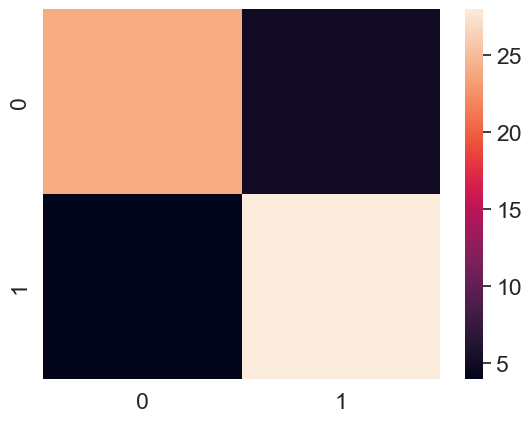

In [343]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat);

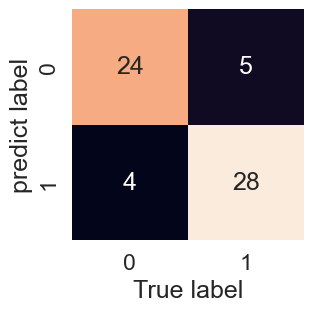

In [346]:
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("predict label")
    
plot_conf_mat(conf_mat)

C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


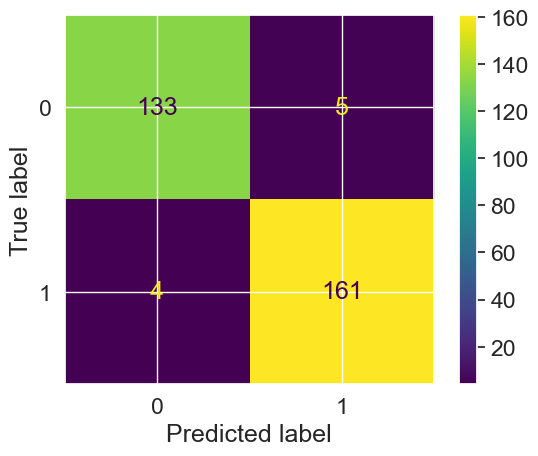

In [348]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y);

In [349]:
## classifiction report

In [350]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

